In [3]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.linalg
%matplotlib ipympl


The Crank-Nicolson method for Heat Equation: 

\begin{equation}  \frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2},\end{equation}



\begin{equation}
\frac{T_{n,i+1}-T_{n,i}}{\Delta t}=\frac{1}{2}\left(\frac{T_{n+1,i+1}-2T_{n,i+1}+T_{n-1,i+1}}{\Delta x^2}+\frac{T_{n+1,i}-2T_{n,i}+T_{n-1,i}}{\Delta x^2}\right).
\end{equation}


Rearranging,


\begin{equation} -\alpha T_{n-1,i+1}+(2+2\alpha)T_{n,i+1}-\alpha T_{n+1,i+1}=\alpha T_{n-1,i}+(2-2\alpha )T_{n,i}+\alpha T_{n+1,i} {eq:1}\end{equation}

where, \begin{equation}
\alpha = \frac{\Delta T}{\Delta x^2} \end{equation}



\begin{equation} A\mathbf{T}_{i+1}=B\mathbf{T}_{i} +\mathbf{b}_{i}+\mathbf{b}_{i+1} \end{equation}





In [8]:
# x axis things
    #No: of x grid points of interest
Nx = 100

Ng = 2

#Total No: of cells
N = Ng+Nx

#Minimum and maximum of x
xi = -1
xf = 1

dx = (xf - xi)/(Nx)
x = np.linspace(xi, xf, N)

#Ghost cells. Need to be fixed throught the solution

#Time things 
ti = 0
tf = 1


dt = 0.08 * dx
t = np.arange(0, 1+dt, dt)

r = 1/4#dt/(dx**2)

tmax = 0.25

#Temperature matrix 
T=np.zeros(N)


#Initial Conditions
pos = int(Nx/2)
T[pos] = 1/(2*dx)
T[pos + 1] = 1/(2*dx)



for $i$ from $1$  to $N-1$, whereas at $i = 0$ and $i = N$, $T$ is 0, which are the boundary conditions. 
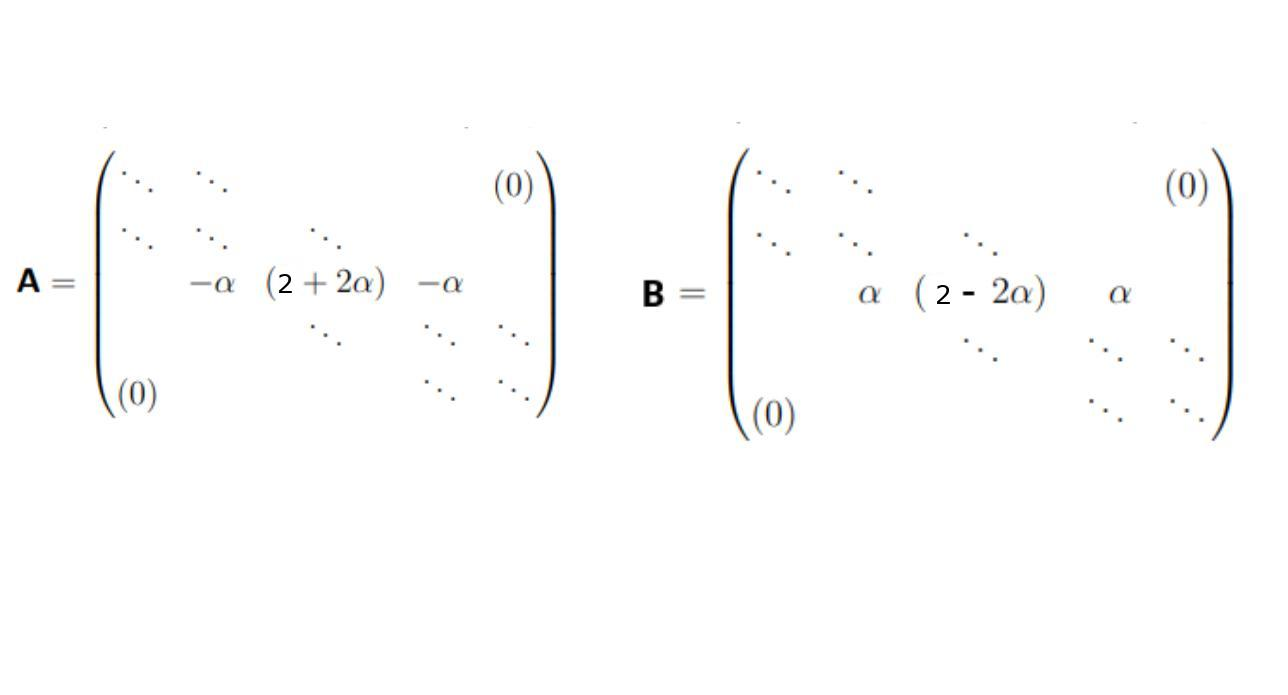

In [9]:
#A digonal matrix

A = np.diag([2+2*r]*(N-2)) + np.diag([-r]*(N-3),-1) + np.diag([-r]*(N-3),1)

B = np.diag([2-2*r]*(N-2)) + np.diag([r]*(N-3),-1) + np.diag([r]*(N-3),1)
b=np.zeros(N-2)



\begin{equation} A{T}_{j+1}=B{T}_{j} + b_{j}+{b}_{j+1} \end{equation}


Since, $b_0,_j$ and $b_0,_{j+1}$ is 0, we can combine it as a single $b$ 

\begin{equation} A{T}_{j+1}=B{T}_{j} + b \end{equation}


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
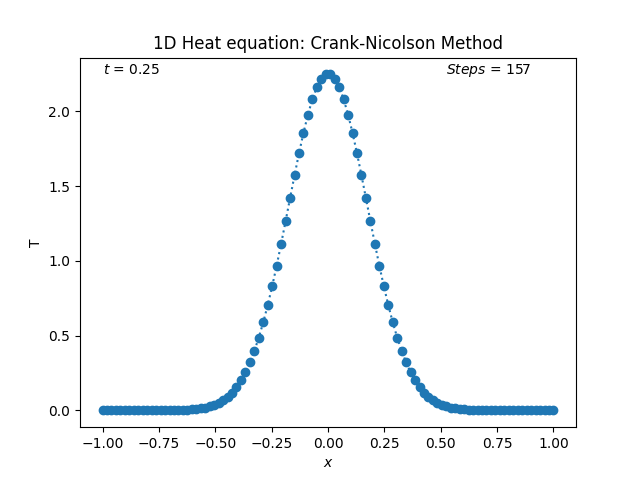

In [10]:

time = 0
steps = 0
while time < tmax:
        # values of b at x = 0 at all times (i.e. 0)
    b[0]= r * T[0]
        # values of b at x = N at all times (i.e. 0)
    b[N-3] = r*T[N-1]

        # dot product of B and wj
    dotproduct = np.dot(B, T[1:N-1])

        #Solving the matrix A and B to get the solution for w[(1,2,...,N-1),j+1]
    T[1:N-1] = scipy.linalg.solve(A, dotproduct+b)
    time+=dt
    steps+=1
    
plt.plot(x, T, ":o" )
plt.text(x[0], np.max(T), "$t$ = " + str(round(time, 2)))
plt.text(x[-int(Nx/4)], np.max(T), "$Steps$ = " + str(steps))

plt.title("1D Heat equation: Crank-Nicolson Method")
plt.xlabel("$x$")
plt.ylabel("T")
#plt.legend()
plt.show()